In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [2]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8  * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

Text(0, 0.5, 'y')

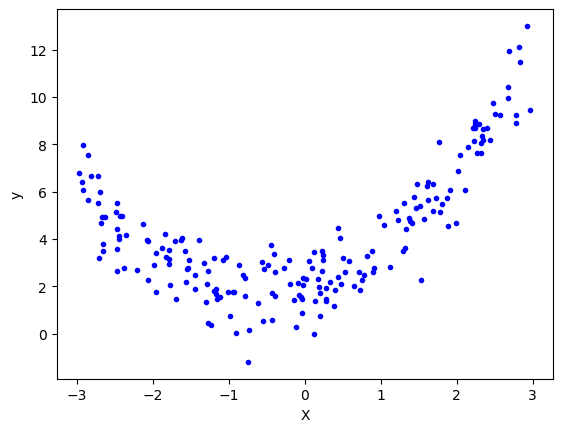

In [5]:
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')

    here 'b.' means -> blue color and use dot marker!!

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [9]:
r2_score(y_test, y_pred)

0.2922625591748558

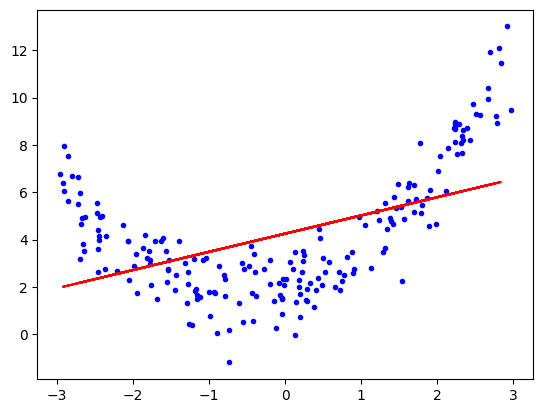

In [13]:
plt.plot(X, y, 'b.')
plt.plot(X_test, y_pred, color = 'r')

In [14]:
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_tns = poly.fit_transform(X_train)
X_test_tns = poly.transform(X_test)

In [15]:
print(X_train[0])
print(X_train_tns[0])

[-1.5468689]
[ 1.         -1.5468689   2.39280338]


In [17]:
lr = LinearRegression()
lr.fit(X_train_tns, y_train)
y_pred = lr.predict(X_test_tns)
r2_score(y_test, y_pred)

0.8472896052183411

In [18]:
lr.coef_

array([[0.        , 0.91255504, 0.80991488]])

In [20]:
lr.intercept_

array([1.96388314])

In [22]:
X_new= np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

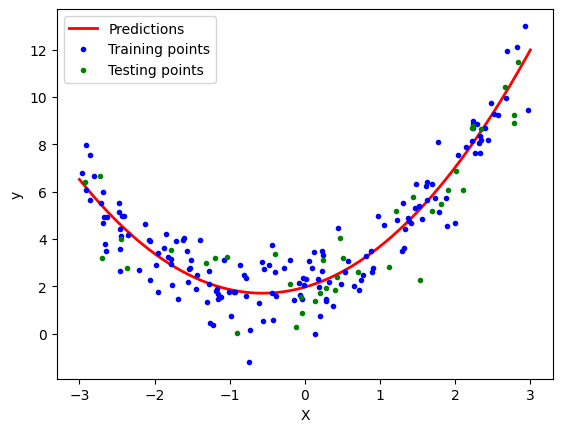

In [23]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()